## Data Science and Business Analytics Internship
## Task 3: Exploratory Data Analysis - Retail
## Author: Ahmed Mohammed 



### Importing nessecary libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [2]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Preprocessing

### Checking for dtypes and missing or dublicated values

In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Checking for duplicate values

In [6]:
df.duplicated().sum()

17

### Dropping the duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

### Remove unnecessary columns

In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df = df.drop(['Postal Code'],axis=1)

In [11]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


### Count of the unique values of a column

In [13]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Visualising the Segment

<AxesSubplot:xlabel='Segment', ylabel='count'>

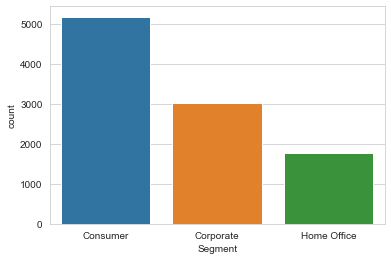

In [14]:
sns.set_style('whitegrid') 
sns.countplot(df['Segment'],order = df['Segment'].value_counts().index)

### Visualising the Cities

<AxesSubplot:xlabel='State', ylabel='count'>

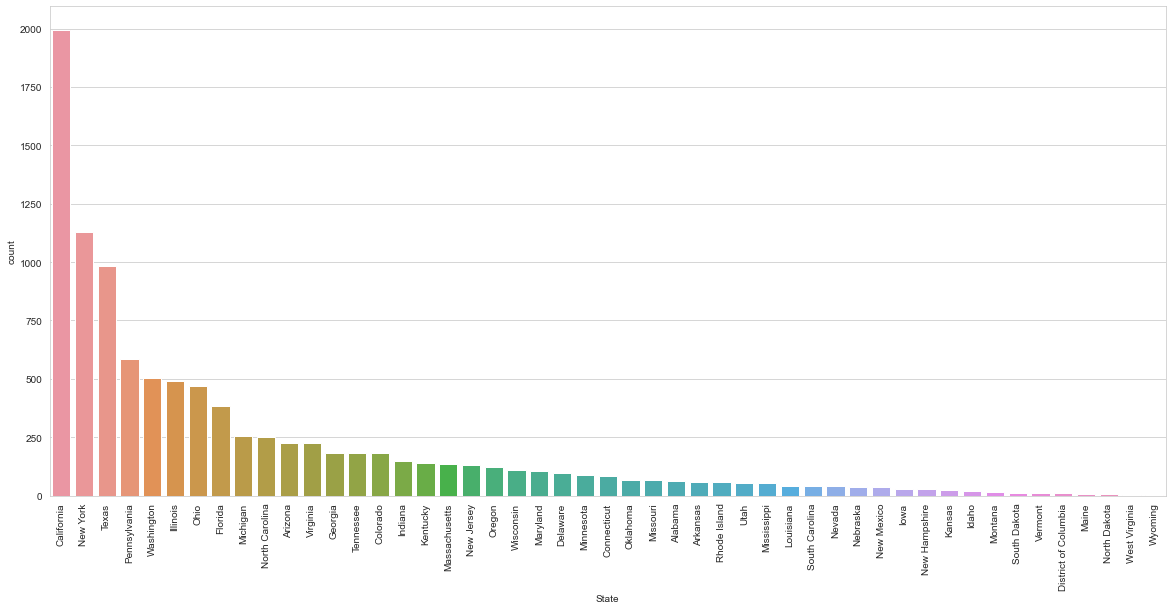

In [15]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
sns.set_style('whitegrid') 
sns.countplot(df['State'],order = df['State'].value_counts().index)

### Visualising the Ship Mode

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

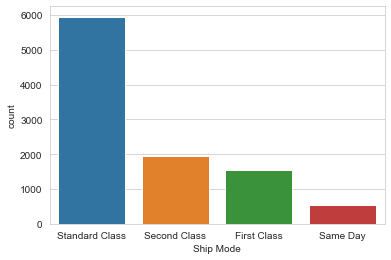

In [16]:
sns.set_style('whitegrid') 
sns.countplot(df['Ship Mode'],order = df['Ship Mode'].value_counts().index)

### Count of unique values from the Region column

In [17]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

### Visualising the Region

<AxesSubplot:xlabel='Region', ylabel='count'>

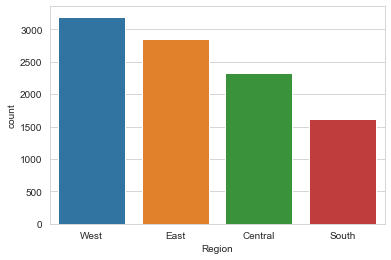

In [18]:
sns.set_style('whitegrid') 
sns.countplot(df['Region'],order = df['Region'].value_counts().index)

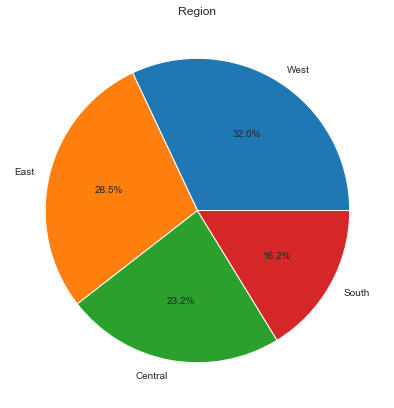

In [19]:
plt.figure(figsize = (7,7))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

## Exploratory Data Analysis

### Correlation between variables

In [20]:
corr = df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


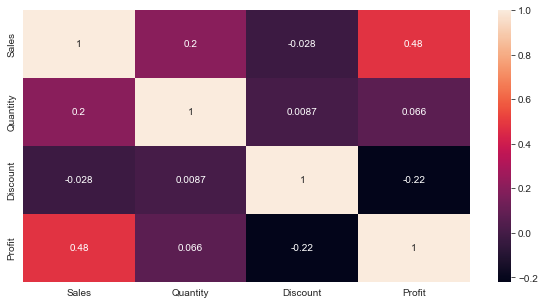

In [21]:
df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

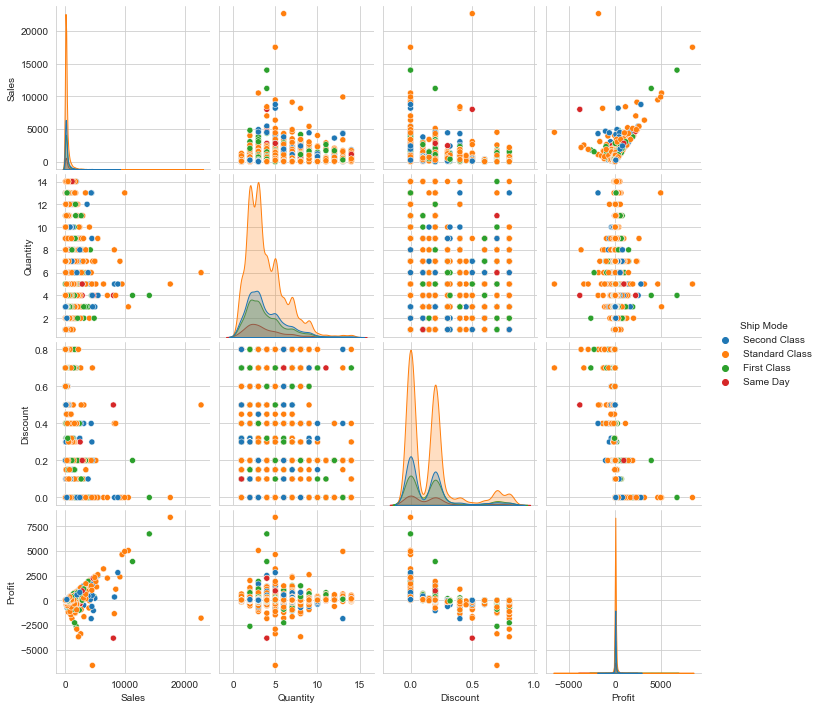

In [22]:
sns.pairplot(df,hue='Ship Mode')

### Visualising the categories

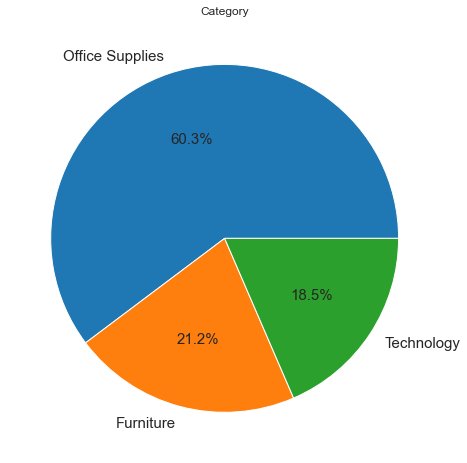

In [23]:
plt.figure(figsize = (8,8))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

### Top Category Sales vs Profit

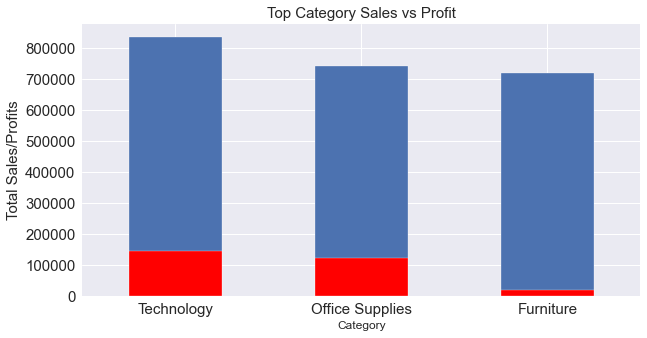

In [24]:
# computing top categories in terms of sales from first 100 observations
top_category_s = df.groupby("Category").Sales.sum().nlargest(n=100)
# computing top categories in terms of profit from first 100 observations
top_category_p = df.groupby("Category").Profit.sum().nlargest(n=100)
# plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (10,5),fontsize = 15)
top_category_p.plot(kind = 'bar',figsize = (10,5),fontsize = 15,color='red')
plt.xlabel('Category',fontsize = 12)
plt.xticks(rotation=0)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Category Sales vs Profit",fontsize = 15)
plt.show()

### Visualising the Sub-Categories

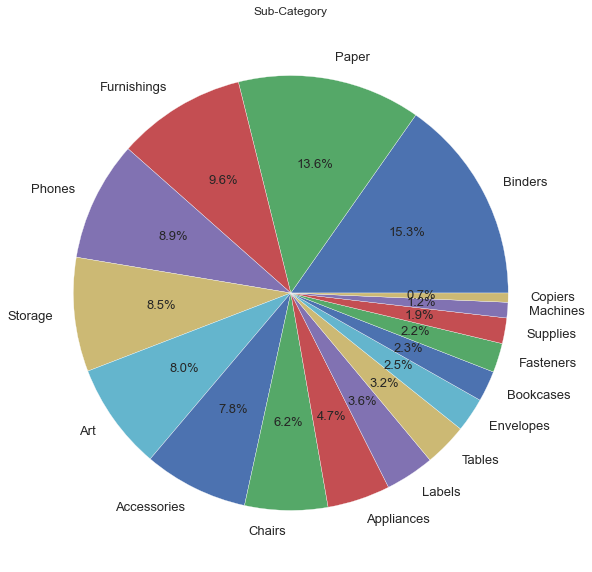

In [25]:
plt.figure(figsize = (10,10))
textprops = {"fontsize":13}
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(), labels=df['Sub-Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

### Top Sub-Category Sales vs Profit

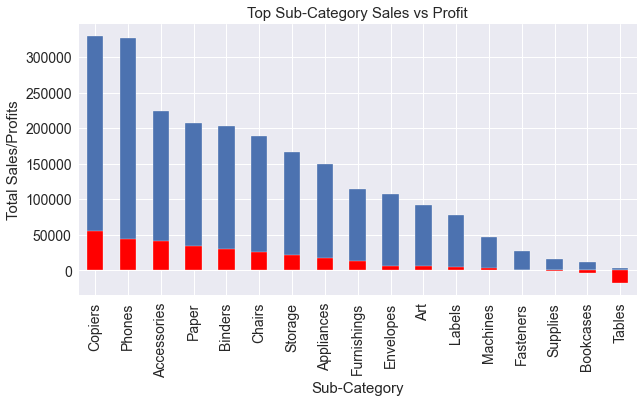

In [26]:
# computing top sub-categories in terms of sales from first 100 observations
top_subcategory_s = df.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
# computing top sub-categories in terms of profit from first 100 observations
top_subcategory_p = df.groupby("Sub-Category").Profit.sum().nlargest(n = 100)
# plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_subcategory_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()

### Highest and lowest profit

<AxesSubplot:ylabel='Sub-Category'>

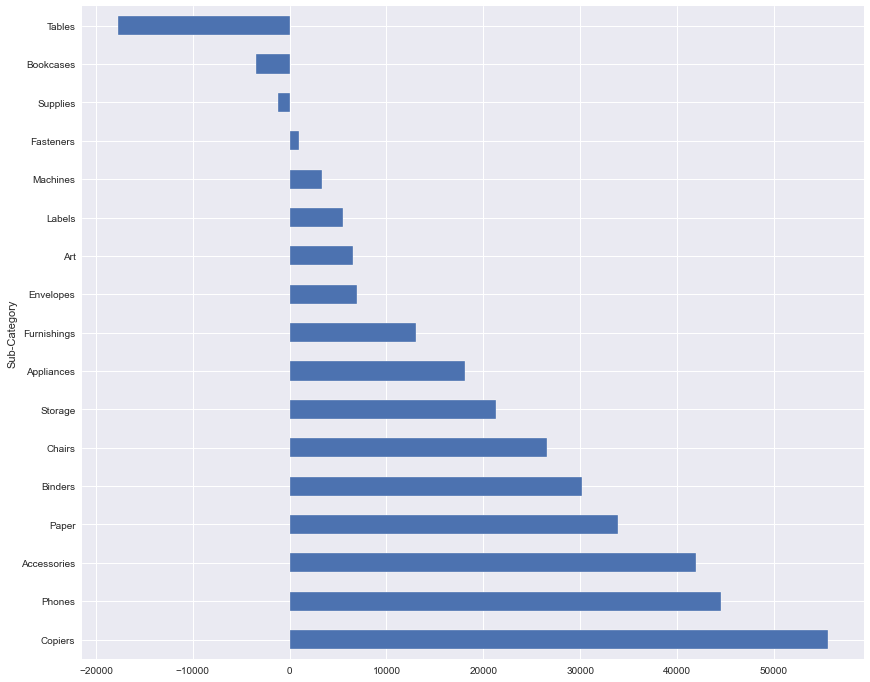

In [27]:
plt.figure(figsize=(14,12))
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh() 

##### Copiers and Phones have the highest sales and profit and tables has negative profit

### Relation based on Sub-Category

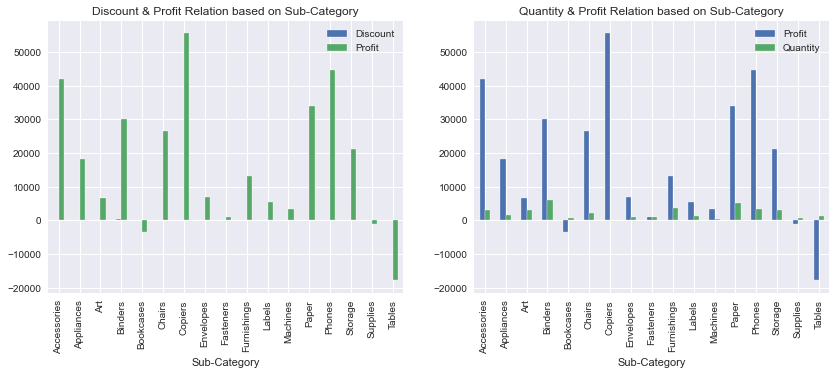

In [28]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
df.groupby('Sub-Category')['Discount','Profit'].agg(sum).plot(kind='bar',ax=axes[0]).set_title('Discount & Profit Relation based on Sub-Category')
df.groupby('Sub-Category')['Profit','Quantity'].agg(sum).plot(kind='bar',ax=axes[1]).set_title('Quantity & Profit Relation based on Sub-Category')
plt.xticks(rotation=90)
plt.show()

### Top 10 Profit & Sales Across State

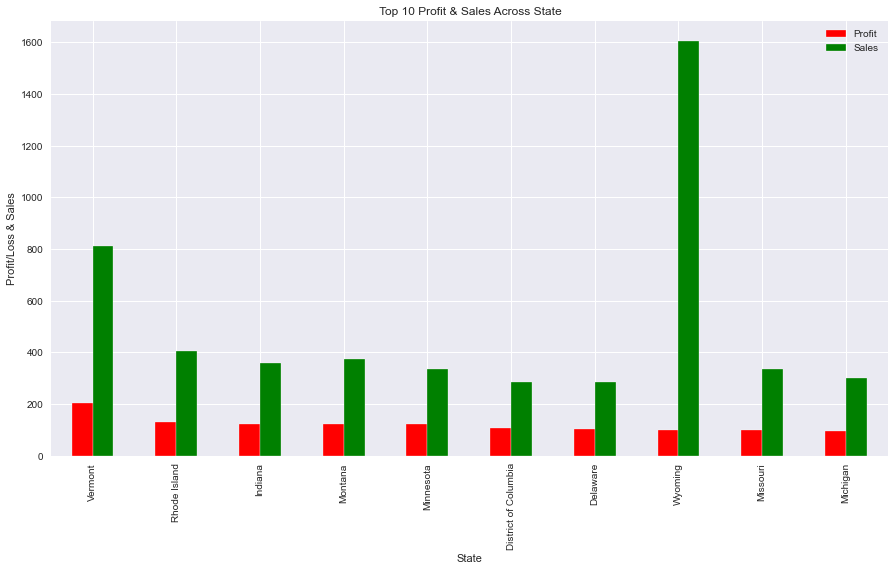

In [29]:
ps1 = df.groupby('State')[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False).iloc[0:10]
ps1[:].plot.bar(color=['red','green'],figsize=(15,8))
plt.title(' Top 10 Profit & Sales Across State')
plt.xlabel('State')
plt.ylabel('Profit/Loss & Sales')
plt.show()

### Top and least profit across states

<AxesSubplot:title={'center':'Top and least profit across states'}, xlabel='State', ylabel='Profit'>

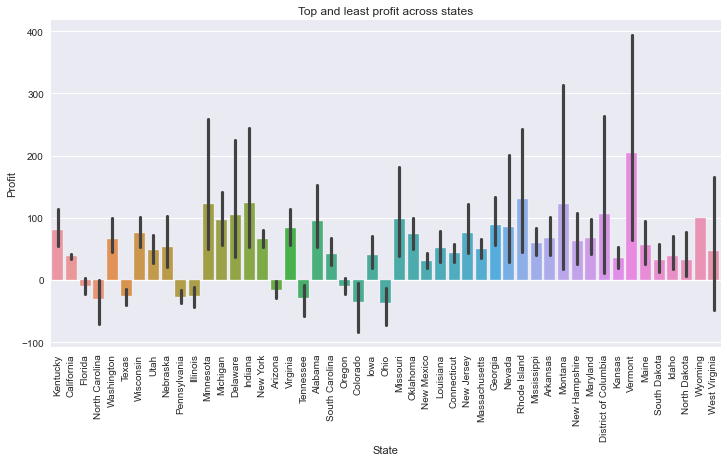

In [30]:
plt.figure(figsize=(12,6))
plt.title('Top and least profit across states')
plt.xticks(rotation=90) 
sns.set_style('whitegrid') 
sns.barplot(x=df['State'], y=df['Profit'])